In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [80]:
dataset_path = './creditcard.csv'
df = pd.read_csv(dataset_path)

In [81]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.int8)

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis = 1)

In [82]:
n_classes = np.unique(y, axis = 0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1
y_encoded.shape

(284807, 2)

In [83]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded, 
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, 
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

In [84]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [85]:
def softmax(z):
    z = z - np.max(z, axis=-1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis = -1, keepdims = True)

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    return y_hat

def compute_loss(y_hat, y):
    epsilon = 1e-7
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    return -np.sum(y * np.log(y_hat)) / y.size

def compute_gradient(X, y,y_hat):
    return np.dot(X.T, y_hat - y) / y.size

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y, axis = 1) == np.argmax(y_hat, axis = 1)).mean()
    return acc

In [86]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size = (n_features, n_classes))

In [87]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]
        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta -= gradient * lr
        train_acc = compute_accuracy(X_i, y_i, theta)

        train_batch_losses.append(train_loss)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_acc = compute_accuracy(X_val, y_val, theta)
        
        val_batch_losses.append(val_loss)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    train_accs.append(train_batch_acc)
    val_losses.append(val_batch_loss)
    val_accs.append(val_batch_acc)

    print (f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss : {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.292	Validation loss : 0.288

EPOCH 2:	Training loss: 0.165	Validation loss : 0.162

EPOCH 3:	Training loss: 0.105	Validation loss : 0.103

EPOCH 4:	Training loss: 0.074	Validation loss : 0.073

EPOCH 5:	Training loss: 0.056	Validation loss : 0.055

EPOCH 6:	Training loss: 0.045	Validation loss : 0.044

EPOCH 7:	Training loss: 0.037	Validation loss : 0.037

EPOCH 8:	Training loss: 0.032	Validation loss : 0.032

EPOCH 9:	Training loss: 0.028	Validation loss : 0.028

EPOCH 10:	Training loss: 0.025	Validation loss : 0.025

EPOCH 11:	Training loss: 0.023	Validation loss : 0.023

EPOCH 12:	Training loss: 0.021	Validation loss : 0.021

EPOCH 13:	Training loss: 0.020	Validation loss : 0.019

EPOCH 14:	Training loss: 0.018	Validation loss : 0.018

EPOCH 15:	Training loss: 0.017	Validation loss : 0.017

EPOCH 16:	Training loss: 0.016	Validation loss : 0.016

EPOCH 17:	Training loss: 0.015	Validation loss : 0.015

EPOCH 18:	Training loss: 0.014	Validation loss : 0.014



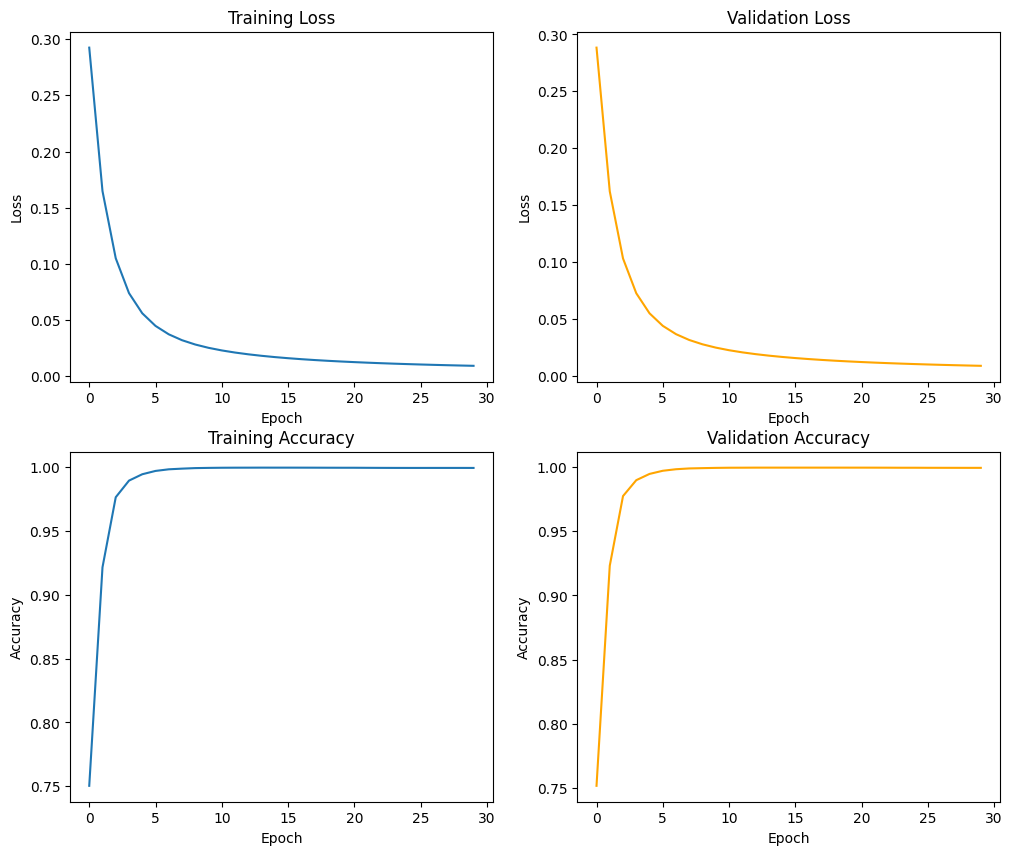

In [89]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel = 'Epoch', ylabel = 'Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel = 'Epoch', ylabel = 'Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [90]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Validation Accuracy: {val_set_acc}')
print(f'Test Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Validation Accuracy: 0.9992977725344794
Test Accuracy: 0.9992616609418639
